# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import folium
import numpy as np
import webbrowser
from folium.plugins import HeatMap

df = pd.read_csv("data/Global_Cybersecurity_Threats_2015-2024.csv")

# Mostrar las primeras filas
df.head()

# df.shape
# df.info()
# df.describe()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


**Análisis de paises afectados y tipo de ataque**

In [2]:
df.groupby(["Country", "Attack Type"])["Number of Affected Users"].agg(["mean", "sum", "count"]).sort_values("sum", ascending=False)


mean       sum  count
Country   Attack Type                                      
Australia Malware            556724.918033  33960220     61
Brazil    SQL Injection      583464.298246  33257465     57
Russia    Ransomware         571451.465517  33144185     58
Brazil    DDoS               530026.196721  32331598     61
Germany   SQL Injection      519746.629032  32224291     62
Australia DDoS               519355.622951  31680693     61
France    Phishing           475132.734375  30408495     64
          SQL Injection      529777.472727  29137761     55
          DDoS               580843.960000  29042198     50
USA       DDoS               476822.733333  28609364     60
Brazil    Ransomware         655131.465116  28170653     43
UK        Phishing           437743.515625  28015585     64
          Man-in-the-Middle  562555.040816  27565197     49
Brazil    Malware            539784.862745  27529028     51
UK        Malware            517266.622642  27415131     53
Japan     Malware            554732.653061  27181900     49
USA       Phishing           501867.814815  27100862     54
India     Man-in-the-Middle  577573.956522  26568402     46
          Ransomware         449016.644068  26491982     59
          SQL Injection      477627.963636  26269538     55
          Phishing           511881.450980  26105954     51
UK        SQL Injection      527784.122449  25861422     49
Japan     Phishing           451760.596491  25750354     57
USA       Ransomware         485111.698113  25710920     53
Russia    SQL Injection      523638.653061  25658294     49
          DDoS               470020.388889  25381101     54
China     DDoS               525336.250000  25216140     48
          Phishing           511560.448980  25066462     49
Brazil    Phishing           463813.148148  25045910     54
Japan     Man-in-the-Middle  455071.690909  25028943     55
Germany   Man-in-the-Middle  506839.836735  24835152     49
UK        DDoS               448415.309091  24662842     55
Japan     SQL Injection      454068.240741  24519685     54
France    Ransomware         479574.117647  24458280     51
Japan     DDoS               494183.183673  24214976     49
Russia    Phishing           615718.641026  24013027     39
          Man-in-the-Middle  488841.591837  23953238     49
UK        Ransomware         469506.000000  23944806     51
Germany   Phishing           517837.239130  23820513     46
China     Ransomware         456682.411765  23290803     51
Germany   DDoS               528250.790698  22714784     43
China     Man-in-the-Middle  515405.181818  22677828     44
Germany   Malware            502071.088889  22593199     45
Australia Man-in-the-Middle  500420.200000  22518909     45
France    Malware            478693.276596  22498584     47
Brazil    Man-in-the-Middle  510734.681818  22472326     44
USA       Man-in-the-Middle  560142.600000  22405704     40
India     Malware            476493.914894  22395214     47
Australia Phishing           439035.549020  22390813     51
China     Malware            505322.477273  22234189     44
Japan     Ransomware         536974.536585  22015956     41
Germany   Ransomware         467117.804348  21487419     46
India     DDoS               426951.380000  21347569     50
China     SQL Injection      468789.244444  21095516     45
USA       Malware            497832.333333  20908958     42
France    Man-in-the-Middle  544311.157895  20683824     38
Australia SQL Injection      520084.410256  20283292     39
Russia    Malware            435695.434783  20041990     46
USA       SQL Injection      512238.473684  19465062     38
Australia Ransomware         479447.575000  19177903     40

**Interpretacion grafica**

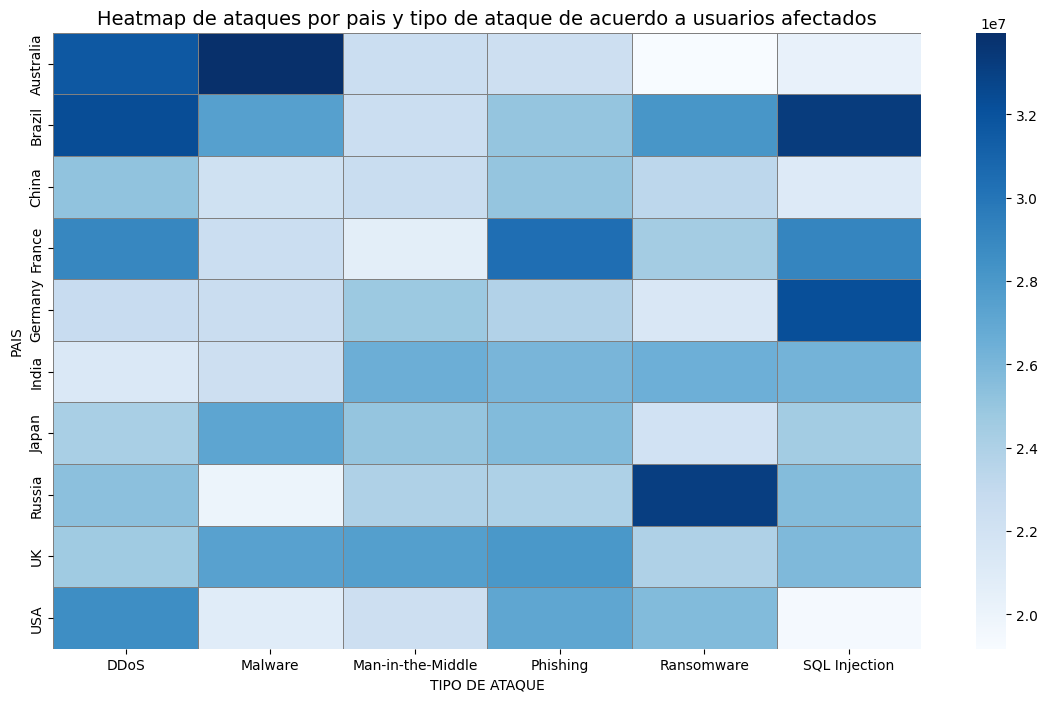

In [3]:
country_attack_stats = (
    df.groupby(["Country", "Attack Type"])["Number of Affected Users"]
      .sum()
      .reset_index()
)
table = country_attack_stats.pivot(index="Country", columns="Attack Type", values="Number of Affected Users").fillna(0)
plt.figure(figsize=(14,8))
sns.heatmap(
    table,
    cmap="Blues",
    linewidths=0.5,
    linecolor="gray"
)
plt.title("Heatmap de ataques por pais y tipo de ataque de acuerdo a usuarios afectados", fontsize=14)
plt.xlabel("TIPO DE ATAQUE")
plt.ylabel("PAIS")
plt.show()


**Generación de mapa de calor**

In [4]:
coords = pd.read_csv("data/country_coordinates.csv")
country_totals = df.groupby("Country")["Number of Affected Users"].sum().reset_index()

attack_types = df.groupby(["Country", "Attack Type"])["Number of Affected Users"].sum().reset_index()
most_frequent_attack = attack_types.loc[attack_types.groupby("Country")["Number of Affected Users"].idxmax()]

country_totals = country_totals.merge(most_frequent_attack[["Country", "Attack Type"]], on="Country", how="left")
country_totals = country_totals.merge(coords, left_on="Country", right_on="Country", how="left")
country_totals = country_totals.dropna(subset=["Latitude", "Longitude"])

attack_colors = {
    "Phishing": "blue",
    "DDoS": "red",
    "Ransomware": "orange",
    "Malware": "green",
    "SQL Injection": "purple",
    "Man-in-the-Middle": "black"
}

m = folium.Map(location=[20, 0], zoom_start=2)
for _, row in country_totals.iterrows():
    attack = row["Attack Type"]
    color = attack_colors.get(attack, "gray")  
    radius = np.log10(row["Number of Affected Users"] + 1) * 2  
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=radius,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=folium.Popup(
            f"<b>País:</b> {row['Country']}<br>"
            f"<b>Usuarios afectados:</b> {row['Number of Affected Users']:,}<br>"
            f"<b>Ataque más frecuente:</b> {attack}",
            max_width=300
        )
    ).add_to(m)

legend_html = """
<div style="
    position: fixed; 
    bottom: 30px; left: 30px; width: 200px; height: 160px; 
    border:2px solid grey; z-index:9999; font-size:14px;
    background-color:white; padding: 10px;
">
<b>🛡️ Tipos de Ataques</b><br>
<i style="color:blue">●</i> Phishing <br>
<i style="color:red">●</i> DDoS <br>
<i style="color:orange">●</i> Ransomware <br>
<i style="color:green">●</i> Malware <br>
<i style="color:purple">●</i> SQL Injection <br>
<i style="color:black">●</i> Man-in-the-Middle
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))
heat_data = [
    [row["Latitude"], row["Longitude"], row["Number of Affected Users"]] 
    for _, row in country_totals.iterrows()
]
max_users = max(row[2] for row in heat_data)
heat_data = [[lat, lon, users / max_users] for lat, lon, users in heat_data]
HeatMap(heat_data, radius=25, blur=15, min_opacity=0.4).add_to(m)
m.save("mapa_ciberataques.html")
webbrowser.open("mapa_ciberataques.html")



True

**Análisis de areas de la industria afectadas**

In [5]:
df.groupby(["Target Industry", "Attack Type", "Year"])["Number of Affected Users"].agg(["mean", "sum", "count"]).sort_values("sum", ascending=False)


,,,mean,sum,count
Target Industry,Attack Type,Year,,,
IT,Phishing,2017,573959.250000,9183348,16
Telecommunications,SQL Injection,2023,544379.466667,8165692,15
Banking,Man-in-the-Middle,2021,580785.000000,8130990,14
Education,Malware,2018,534688.266667,8020324,15
IT,Phishing,2024,495592.466667,7433887,15
...,...,...,...,...,...
Banking,SQL Injection,2016,332580.000000,997740,3
Government,Man-in-the-Middle,2021,325508.666667,976526,3
Education,Malware,2016,298322.333333,894967,3


**Interpretacion grafica de areas afectadas**

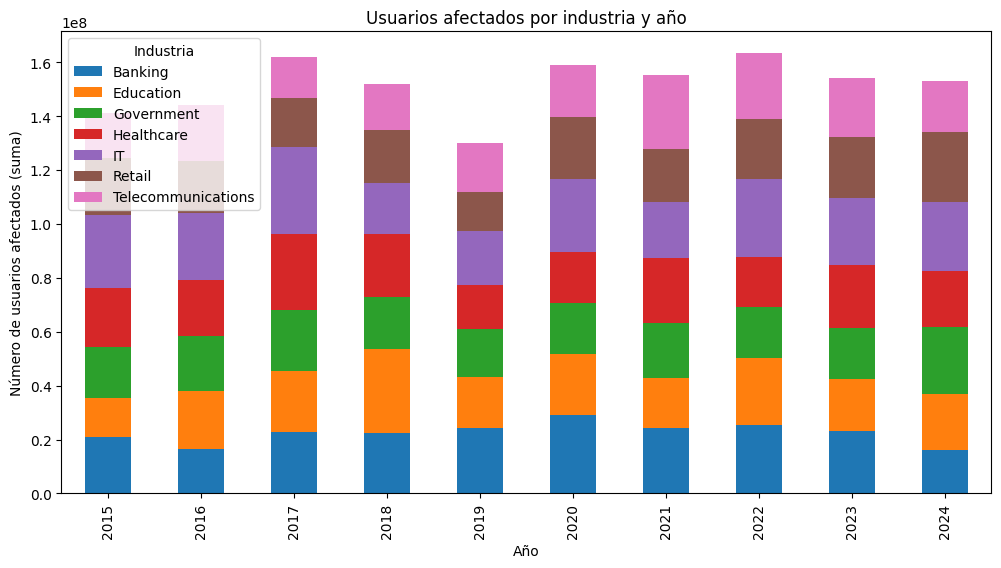

In [6]:
grouped = df.groupby(["Target Industry", "Attack Type", "Year"])["Number of Affected Users"] \
            .agg(["mean", "sum", "count"]) \
            .reset_index()
pivot_data = grouped.pivot_table(index="Year", 
                                 columns="Target Industry", 
                                 values="sum", 
                                 aggfunc="sum")

pivot_data.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Usuarios afectados por industria y año")
plt.ylabel("Número de usuarios afectados (suma)")
plt.xlabel("Año")
plt.legend(title="Industria")
plt.show()
 

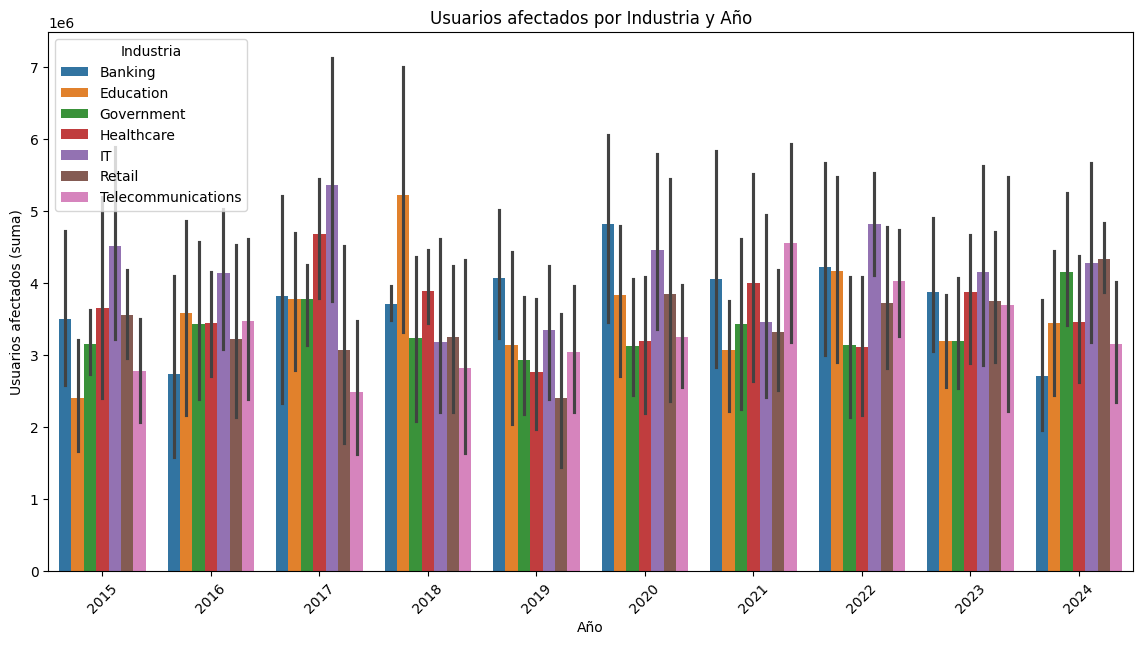

In [7]:
plt.figure(figsize=(14,7))
sns.barplot(
    data=grouped,
    x="Year",
    y="sum",
    hue="Target Industry"
)
plt.title("Usuarios afectados por Industria y Año")
plt.ylabel("Usuarios afectados (suma)")
plt.xlabel("Año")
plt.xticks(rotation=45)
plt.legend(title="Industria")
plt.show()


**Modelo de aprendizaje automatico sobre a que tipo de ataque es mas propenso una industria**

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import joblib
df_ml = df.copy()
le_industry = LabelEncoder()
le_attack = LabelEncoder()
df_ml["Target Industry"] = le_industry.fit_transform(df_ml["Target Industry"])
df_ml["Attack Type"] = le_attack.fit_transform(df_ml["Attack Type"])
X = df_ml[["Target Industry", "Year", "Number of Affected Users"]]
y = df_ml["Attack Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)
joblib.dump(modelo, "modelo_ciberataques.pkl")
joblib.dump(X.columns.tolist(), "columnas.pkl")
joblib.dump(le_attack, "le_attack.pkl")
joblib.dump(le_industry, "le_industry.pkl")

['le_industry.pkl']